## Perceptrons e a inspiração biológica para regressão logística

Regressão logística pode ser vista como um tipo de perceptron, um algoritmo antigo de inteligência artificial que tem se inspira levemente no funcionamento dos neurônios. De maneira bem simplificada, nós podemos pensar nos neurônios como células que recebem um sinal e passam esse sinal adiante se um limiar for excedido. Isso é exatamente o que a regressão logística faz: pondera um sinal de várias variáveis, soma esses sinais, e passa por uma função achatamento, produzindo uma probabilidade. Se essa probabilidade for maior do que um limiar, a regressão logística o os perceptrons ativam, ou seja, retornam 1. Caso os sinais recebidos não forem fortes o suficiente, a regressão logística e os perceptrons não disparam, produzindo zero.

As diferenças entre perceptrons e regressão logística são muito sutis que nem vale a pena mencioná-las. Mais importante é saber do que são capazes esses modelos e quais as suas limitações. 

Em primeiro lugar, precisamos entender que a regressão logística e os perceptrons acham uma linha de separação entre as classes. Se essa linha existir, esses modelos irão encontrá-las com certeza, dado uma taxa de aprendizado suficientemente baixa e um numero suficiente de iterações de treino. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from IPython import display


class perceptron(object):

    def __init__(self, lrate = 1, w=None, maxiter=3, tol = 0, plot_= False):
        self.lrate = lrate
        self.maxiter = maxiter
        self.tol = tol
        self.plot_ = plot_
        self.w = w

    def __update_w(self, X_train, y_train):

        for xi, yi in zip(X_train, y_train):

            if int(np.sign(np.dot(xi, self.w.T))) != int(yi):
                self.w += (xi.T * self.lrate)*yi


    def __eval_perceptron(self, X_train, y_train):

        error = 0
        miss_indx = []
        for xi, yi, i in zip(X_train, y_train, range(len(y_train))):

            if int(np.sign(np.dot(xi, self.w.T))) != int(yi):
                error += 1

        return error


    def _plot(self, X, y, true_w=None):
        a, b = -self.w[1]/self.w[2], -self.w[0]/self.w[2] 
        l = np.linspace(-1,1)
        ax = plt.subplot(111)
        
        ax.plot(l, a*l+b, 'green')
        cols = {1: 'r', -1: 'b'}
        
        ax.set_xlim([-1,1])
        ax.set_ylim([-1,1])
        
        for x,s in zip(X, y):
            ax.plot(x[0], x[1], cols[s]+'o')

        if not true_w is None:
            a, b = -true_w[1]/true_w[2], -true_w[0]/true_w[2] 
            ax.plot(l, a*l+b, '-k')
            
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.clf() # limpa a imagem do gráfico
        

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        X_train = np.insert(X_train, 0, 1, 1) # adiciona vies
        y_train = np.array(y_train)

        if self.w is None:
            self.w = np.random.normal(0, 10, len(X_train[0]))

        count = 0
        while True:

            error = self.__eval_perceptron(X_train, y_train)
            self.__update_w(X_train, y_train)

            count += 1
            if error < self.tol or count > self.maxiter:
                break

            if self.plot_:
                self._plot(X_train[:, 1:], y_train)

    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, 1)
        return np.sign(np.dot(X_test, self.w.T))

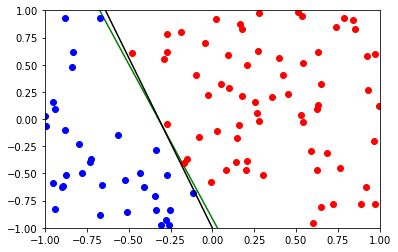

In [2]:
np.random.seed(5)
# gera dados linearmente separáveis em 2D
x1,y1,x2,y2 = [np.random.uniform(-1, 1) for i in range(4)] # define 2 pontos
w_target = np.array([x2*y1-x1*y2, y2-y1, x1-x2]) # gera vetor
a, b = -w_target[1]/w_target[2], -w_target[0]/w_target[2] # para desenhar

X = np.random.uniform(-1, 1, (100, 2)) # gera 100 pontos 
y = np.sign(np.dot(np.insert(X, 0, 1, 1), w_target.T)) # gera targets


# usa perceptron para separar os dados	
clf = perceptron(maxiter=30, lrate = .1, plot_ = True)
clf.fit(X, y)

# mostra resultados
clf._plot(X, y, true_w = w_target)

%matplotlib notebook

No entanto, exitem duas limitações que devemos nos atentar quando utilizando esses modelos. A primeira é que nem regressão logística e nem perceptrons conseguem achar a fronteira de separação entre as classes se essa fronteira não for uma reta. Essa limitação vem do fato desses modelos serem lineares. A segunda limitação é que regressão logística e perceptrons acham apenas alguma reta de separação entre as classes, mas não é garantido que eles encontrem a melhor reta de separação.